In [538]:
# Data Cleaning
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
#print("Seaborn version:", sns.__version__)

import seaborn as sns
import statsmodels
#Read data from loan file
df = pd.read_csv('/home/srinivasans/upgrad/aiml/python/ML_linear_regr_2/train.csv',low_memory=False)
df.head()

# mapping = {1:'spring',2:'summer', 3:'fall', 4:'winter'}
# df['season'] = df['season'].map(mapping)
# mapping = {0:2018,1:2019}
# df['yr'] = df['yr'].map(mapping)

# Display the first few rows of the DataFrame
# print(df.head())
# Perform dummy variable for SaleType 
# df['SaleType'] = pd.Categorical(df['SaleType'])
# dummy_variables = pd.get_dummies(df['SaleType'], prefix='ST')
# dummy_variables = dummy_variables.astype(int)
# # Concatenate the dummy variables with the original DataFrame
# df = pd.concat([df, dummy_variables], axis=1)
# # Drop the original categorical variable
# df.drop('SaleType', axis=1, inplace=True)
# # Display the modified DataFrame
# print(df.head())

# df['SaleCondition'] = pd.Categorical(df['SaleCondition'])
# dummy_variables = pd.get_dummies(df['SaleCondition'], prefix='SC')
# dummy_variables = dummy_variables.astype(int)
# # Concatenate the dummy variables with the original DataFrame
# df = pd.concat([df, dummy_variables], axis=1)
# # Drop the original categorical variable
# df.drop('SaleCondition', axis=1, inplace=True)
# # Display the modified DataFrame
# print(df.head())

# df['MiscFeature'] = pd.Categorical(df['MiscFeature'])
# dummy_variables = pd.get_dummies(df['MiscFeature'], prefix='MF')
# dummy_variables = dummy_variables.astype(int)
# # Concatenate the dummy variables with the original DataFrame
# df = pd.concat([df, dummy_variables], axis=1)
# # Drop the original categorical variable
# df.drop('MiscFeature', axis=1, inplace=True)
# # Display the modified DataFrame
# print(df.head())

# df['GarageType'] = pd.Categorical(df['GarageType'])
# dummy_variables = pd.get_dummies(df['GarageType'], prefix='GarTyp')
# dummy_variables = dummy_variables.astype(int)
# # Concatenate the dummy variables with the original DataFrame
# df = pd.concat([df, dummy_variables], axis=1)
# # Drop the original categorical variable
# df.drop('GarageType', axis=1, inplace=True)
# # Display the modified DataFrame
# print(df.head())


# Label encdding - categorical columns to assign integer labels
df['SaleType'], labels = pd.factorize(df['SaleType'])
# Optionally, you can create a dictionary to map the original categories to their integer labels
label_mapping = dict(zip(labels, range(len(labels))))
# Print the mapping of categories to labels
print(label_mapping)

df['SaleCondition'], labels  = pd.factorize(df['SaleCondition'])
label_mapping = dict(zip(labels, range(len(labels))))
# Print the mapping of categories to labels
print(label_mapping)

df['MiscFeature'], labels = pd.factorize(df['MiscFeature'])
label_mapping = dict(zip(labels, range(len(labels))))
# Print the mapping of categories to labels
print(label_mapping)

df['GarageType'], labels = pd.factorize(df['GarageType'])
label_mapping = dict(zip(labels, range(len(labels))))
# Print the mapping of categories to labels
print(label_mapping)
df.info()

Pandas version: 2.0.3
NumPy version: 1.24.4
Matplotlib version: 3.7.4
{'WD': 0, 'New': 1, 'COD': 2, 'ConLD': 3, 'ConLI': 4, 'CWD': 5, 'ConLw': 6, 'Con': 7, 'Oth': 8}
{'Normal': 0, 'Abnorml': 1, 'Partial': 2, 'AdjLand': 3, 'Alloca': 4, 'Family': 5}
{'Shed': 0, 'Gar2': 1, 'Othr': 2, 'TenC': 3}
{'Attchd': 0, 'Detchd': 1, 'BuiltIn': 2, 'CarPort': 3, 'Basment': 4, '2Types': 5}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null 

In [539]:
import sklearn
from sklearn.model_selection import train_test_split

#Create train sets [70-30]
#Train model on training data set - learning the coefficients
# Model evaluation - Training set, Test set

#Create x and y
x=(df['OverallQual'])
y=(df['SalePrice'])
#Training the model
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.70, random_state=100)
x_train_sm = sm.add_constant(x_train)
x_train_sm.head()

,const,OverallQual
318,1.0,7
239,1.0,6
986,1.0,6
1416,1.0,4
390,1.0,5


In [540]:
#Fitting the model
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1656.
Date:                Wed, 01 May 2024   Prob (F-statistic):          8.22e-216
Time:                        22:08:25   Log-Likelihood:                -12471.
No. Observations:                1021   AIC:                         2.495e+04
Df Residuals:                    1019   BIC:                         2.496e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.033e+04   6830.570    -13.225      0.000   -1.04e+05   -7.69e+04
OverallQual  4.447e+04   1092.615     40.698      0.000    4.23e+04    4.66e+04
==============================================================================
Omnibus:                      442.539   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5136.786
Skew:                           1.664   Prob(JB):                         0.00
Kurtosis:                      13.472   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [541]:
#plt.plot(x_train, 1080.7400 + 169.3134 * x_train, 'r')
y_train_pred = lr_model.predict(x_train_sm)

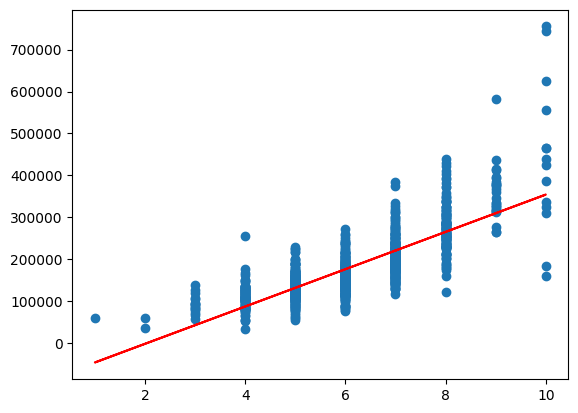

In [542]:
plt.scatter(x_train,y_train)
plt.plot(x_train, y_train_pred, 'r')
plt.show()

In [543]:
#Residual Analysis
# f(R) = y_train, y_train_pred
res = y_train - y_train_pred
res

318     39060.245700
239    -63472.053285
986    -59472.053285
1416    34963.348746
390    -13004.352269
            ...     
802    -31939.754300
53      75124.843669
350      8185.843669
79     -22004.352269
792     48850.245700
Length: 1021, dtype: float64

Text(0.5, 1.0, 'Residuals')

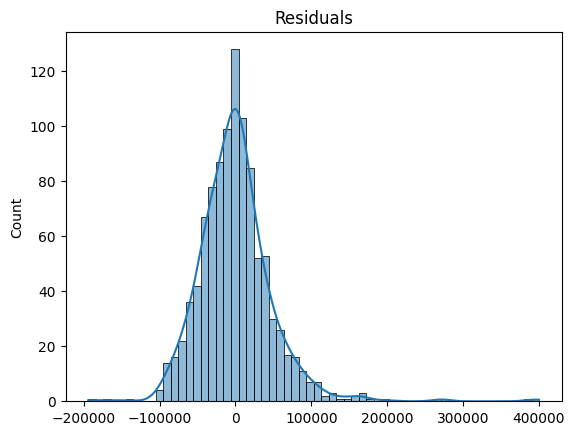

In [544]:
#draw residuals
plt.figure()
#sns.distplot(res)
sns.histplot(res, kde=True)
plt.title("Residuals")

In [545]:
#Residual Analysis
# f(R) = y_train, y_train_pred
res = y_train - y_train_pred
res

318     39060.245700
239    -63472.053285
986    -59472.053285
1416    34963.348746
390    -13004.352269
            ...     
802    -31939.754300
53      75124.843669
350      8185.843669
79     -22004.352269
792     48850.245700
Length: 1021, dtype: float64

Text(0.5, 1.0, 'Residuals')

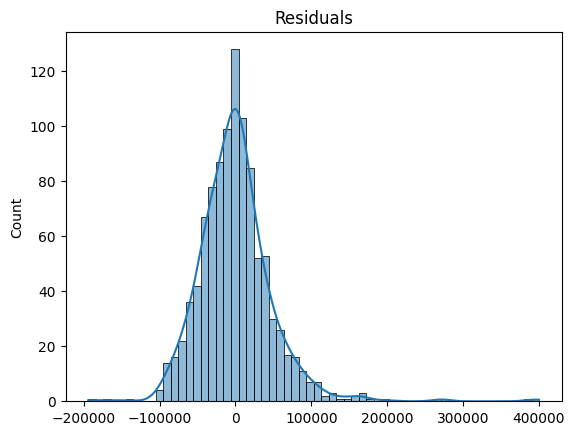

In [546]:
#draw residuals
plt.figure()
#sns.distplot(res)
sns.histplot(res, kde=True)
plt.title("Residuals")

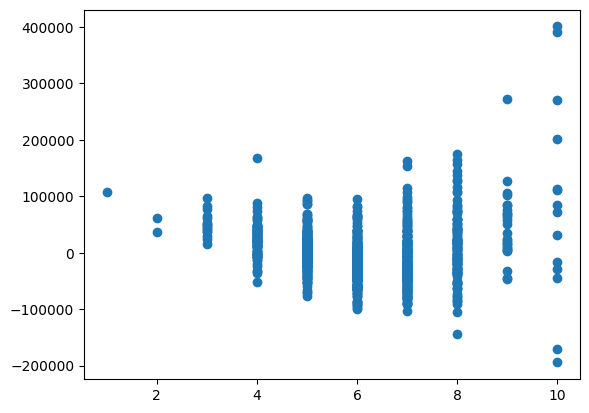

In [547]:
#Look for patterns in residuals
plt.scatter(x_train,res)
plt.show()

In [551]:
from sklearn.linear_model import LinearRegression
x_train_lm = x_train.values.reshape(-1,1)
x_test_lm = x_test.values.reshape(-1,1)

In [552]:
#SKLearn model building
#create an object of linear regression
lm = LinearRegression()
#Fit the model
lm.fit(x_train_lm,y_train)
#See the params, make predictions(train,test)
# Evaluate R2
print(lm.coef_)
print(lm.intercept_)

[44467.70101543]
-90334.15280801835


In [553]:
#Make predictions
y_train_pred = lm.predict(x_train_lm)
y_test_pred  = lm.predict(x_test_lm)

In [554]:
#Model Evaluation
r2_y_train_pred=r2_score(y_true=y_train, y_pred=y_train_pred)
r2_y_test_pred = r2_score(y_true=y_test, y_pred=y_test_pred)
print(r2_y_train_pred)
print(r2_y_test_pred)

0.6191169814070797
0.639441083723306


      SaleType  LotArea  LotFrontage  OverallQual  OverallCond  MasVnrArea  \
0            0     8450         65.0            7            5       196.0   
1            0     9600         80.0            6            8         0.0   
2            0    11250         68.0            7            5       162.0   
3            0     9550         60.0            7            5         0.0   
4            0    14260         84.0            8            5       350.0   
...        ...      ...          ...          ...          ...         ...   
1455         0     7917         62.0            6            5         0.0   
1456         0    13175         85.0            6            6       119.0   
1457         0     9042         66.0            7            9         0.0   
1458         0     9717         68.0            5            6         0.0   
1459         0     9937         75.0            5            6         0.0   

      TotalBsmtSF  GrLivArea  BsmtUnfSF  TotRmsAbvGrd  SalePric

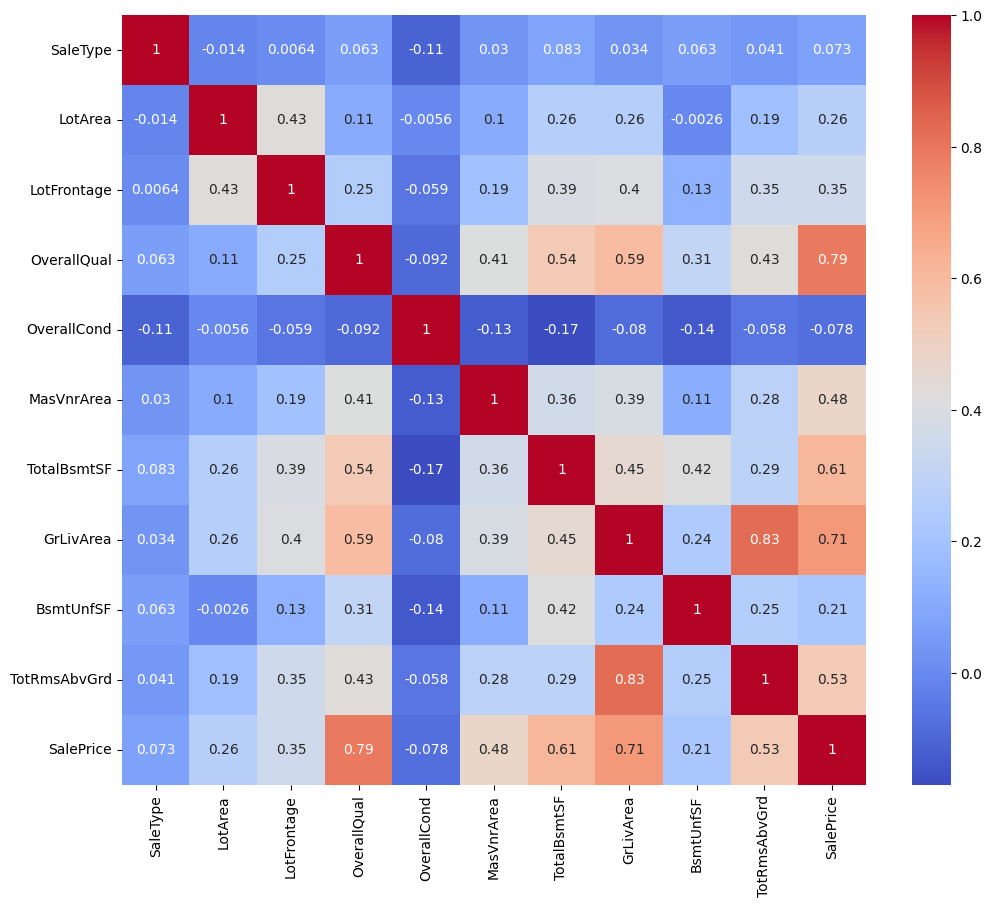

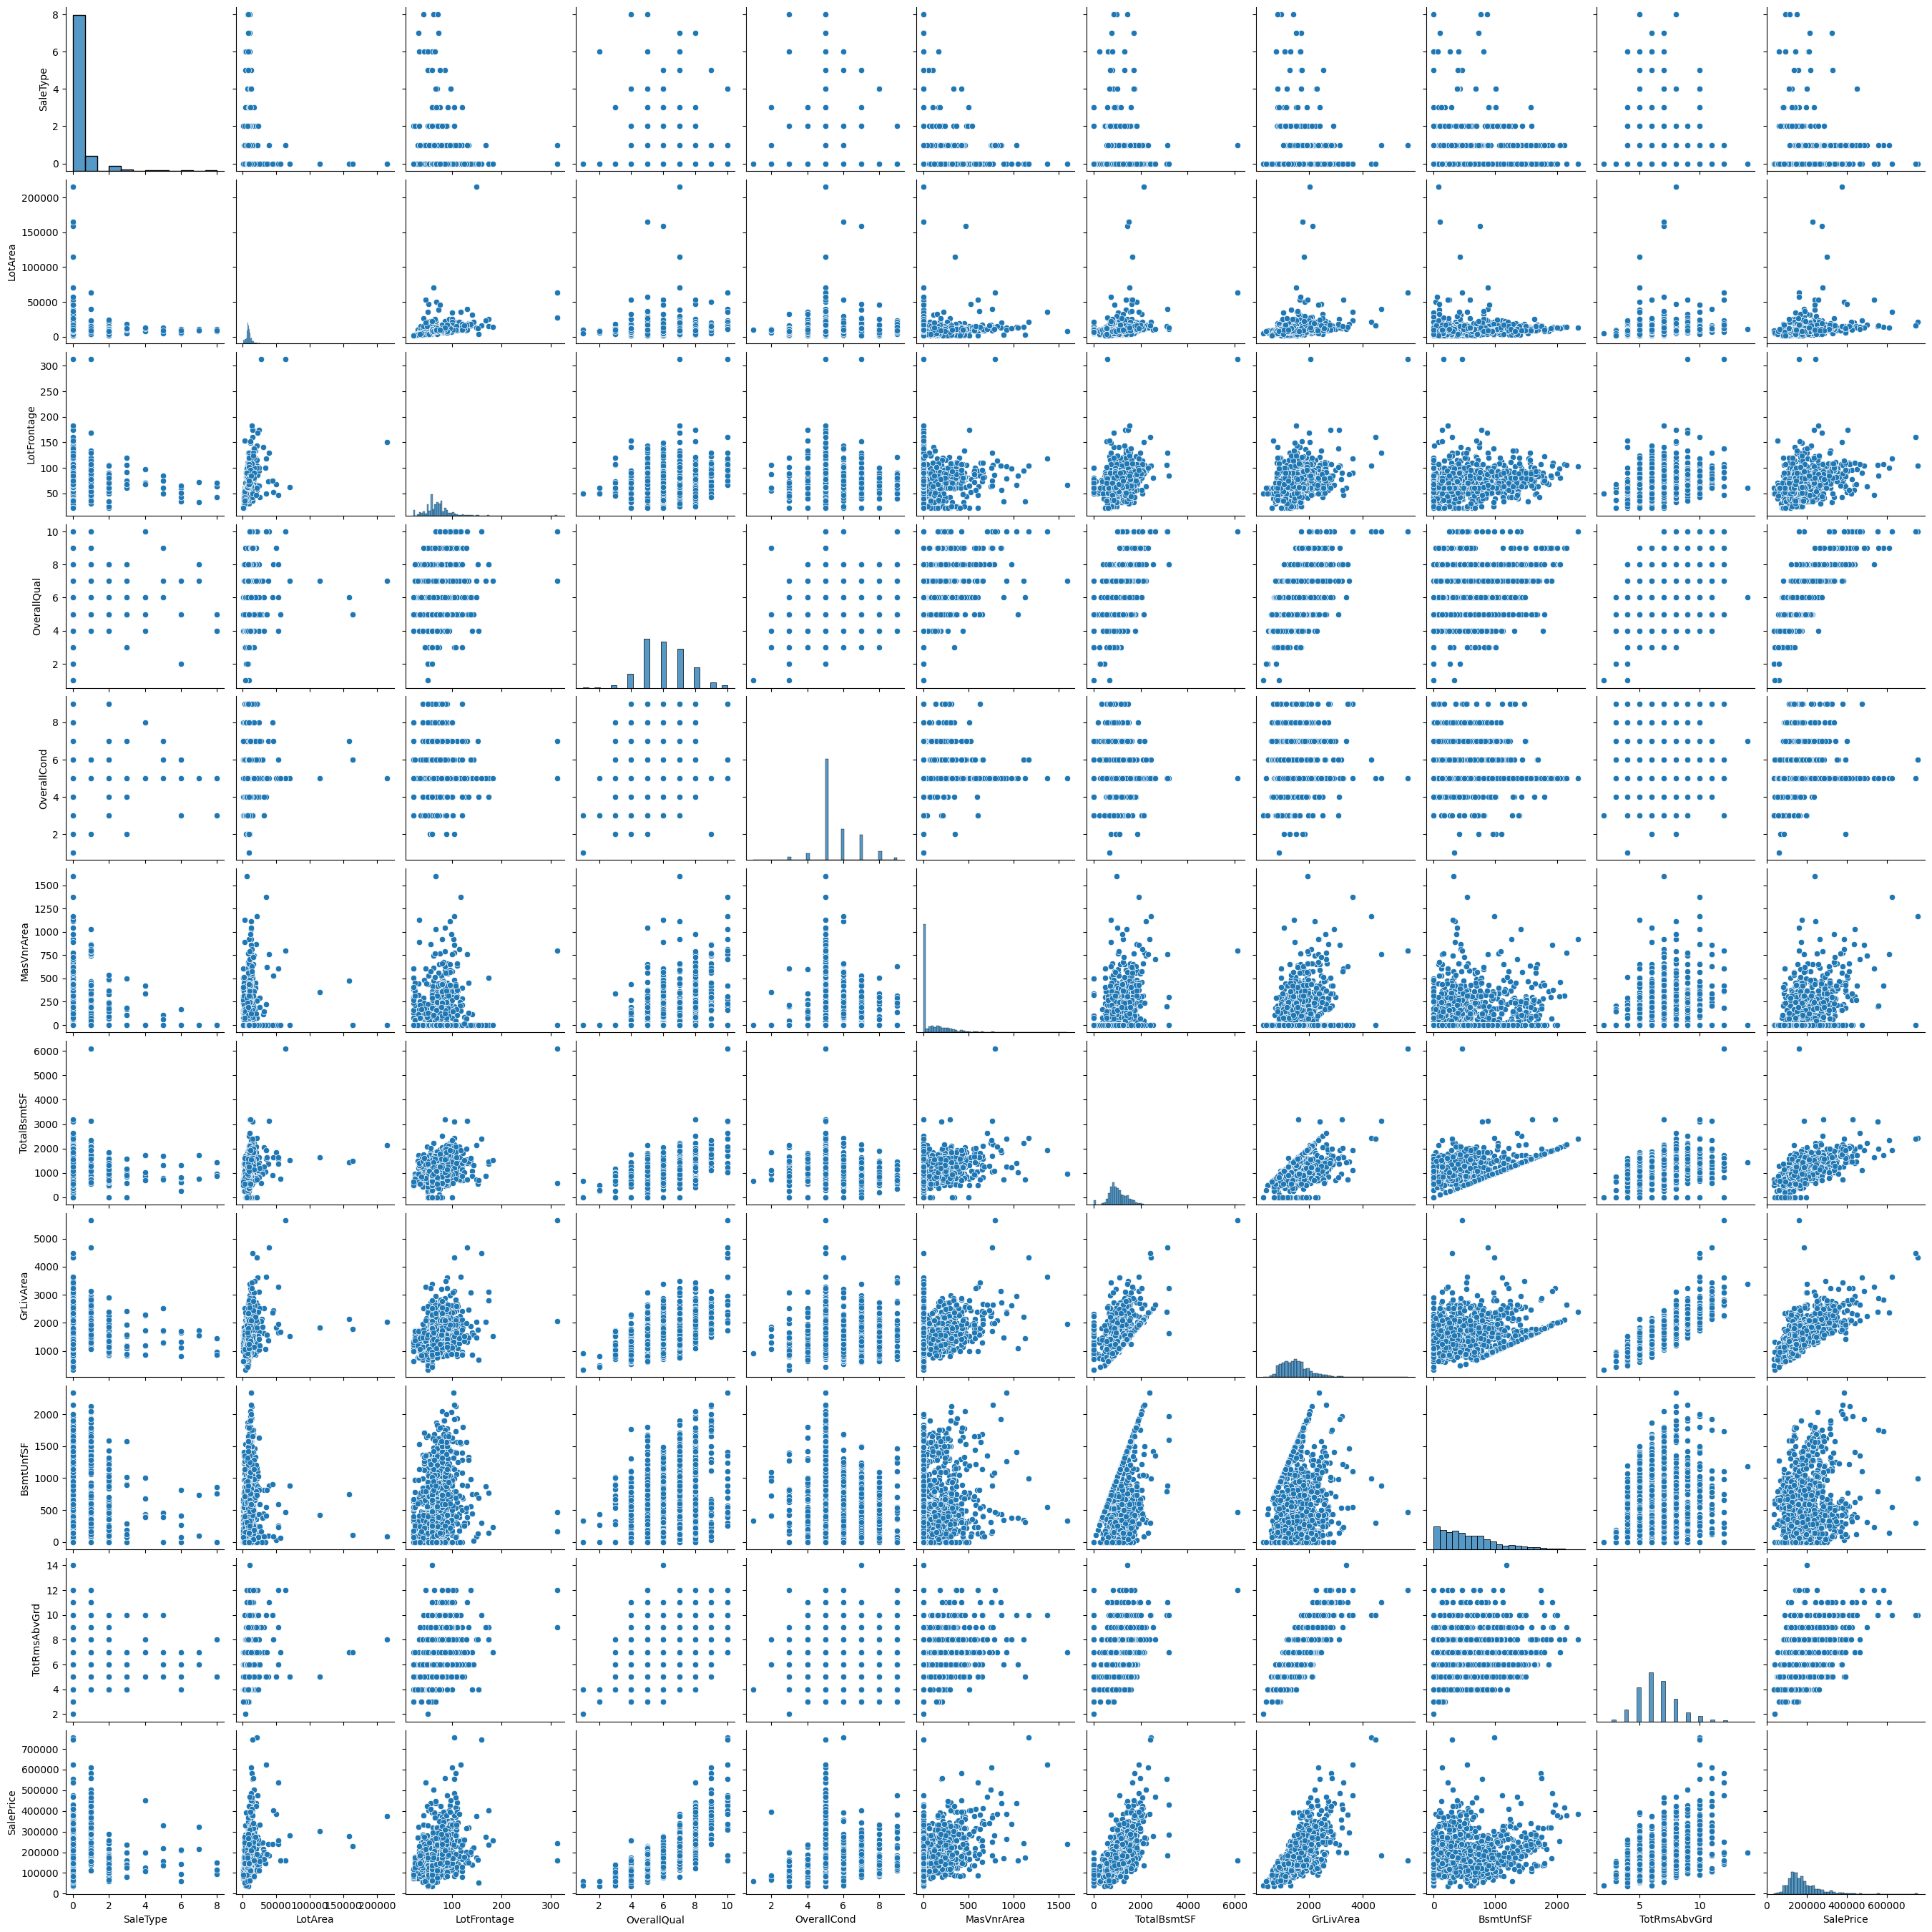

In [555]:
#Multiple Linear Regression
from sklearn.model_selection import train_test_split

pd.options.mode.copy_on_write = True

#['LotArea','LotFrontage','OverallQual','OverallCond','MasVnrArea','TotalBsmtSF','GrLivArea','BsmtUnfSF','TotRmsAbvGrd','SaleType']

#Multiple Linear regression using RFE and (p-value, VIF) 
#Data selection . Data already changed and dummies are created, and mappig already done
df1 = df[['SaleType','LotArea','LotFrontage','OverallQual','OverallCond','MasVnrArea','TotalBsmtSF','GrLivArea','BsmtUnfSF','TotRmsAbvGrd','SalePrice']]
print(df1)

plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(),annot=True, cmap='coolwarm')
sns.pairplot(df1)
plt.show()

# plt.figure(figsize=(20, 12))
# plt.subplot(1,3,1)
# sns.boxplot(x = 'OverallCond', y = 'Saleprice', data = df1)
# plt.subplot(1,3,2)
# sns.boxplot(x = 'TotalBsmtSF', y = 'Saleprice', data = df1)
# plt.subplot(1,3,3)
# sns.boxplot(x = 'TotRmsAbvGrd', y = 'Saleprice', data = df1)
# # Training and test data
# from sklearn.model_selection import train_test_split

# n=10
# np.random.seed(0)
# df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)plt.show()

In [556]:
# Training and test data
from sklearn.model_selection import train_test_split

n=10
np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler_vars = ['SaleType','LotArea','OverallQual','SalePrice']
scaler_vars = ['SaleType','LotArea','LotFrontage','OverallQual','OverallCond','MasVnrArea','TotalBsmtSF','GrLivArea','BsmtUnfSF','TotRmsAbvGrd','SalePrice']
df_train[scaler_vars] = scaler.fit_transform(df_train[scaler_vars])
df_train.head()

,SaleType,LotArea,LotFrontage,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtUnfSF,TotRmsAbvGrd,SalePrice
210,0.0,0.019306,0.157534,0.444444,0.625,0.00,0.141408,0.081860,0.169521,0.181818,0.087627
318,0.0,0.039403,0.236301,0.666667,0.500,0.16,0.220458,0.424289,0.154110,0.545455,0.312595
239,0.0,0.033981,0.106164,0.555556,0.375,0.00,0.120295,0.201576,0.274401,0.363636,0.108457
986,0.0,0.017931,0.130137,0.555556,0.875,0.00,0.079378,0.230015,0.207620,0.181818,0.114012
1416,0.0,0.046139,0.133562,0.333333,0.625,0.00,0.127169,0.355880,0.332620,0.727273,0.121650


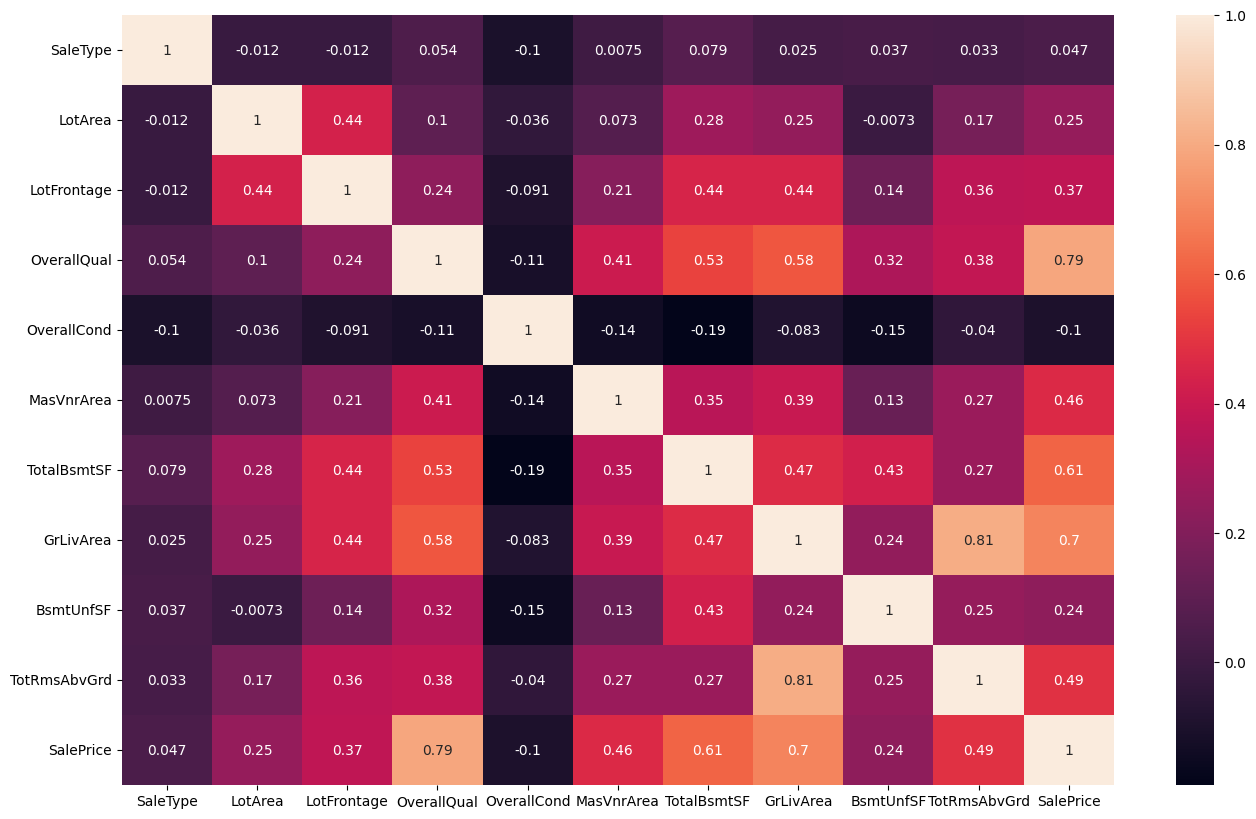

<class 'pandas.core.frame.DataFrame'>
Index: 1021 entries, 210 to 79
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SaleType      1021 non-null   float64
 1   LotArea       1021 non-null   float64
 2   LotFrontage   844 non-null    float64
 3   OverallQual   1021 non-null   float64
 4   OverallCond   1021 non-null   float64
 5   MasVnrArea    1017 non-null   float64
 6   TotalBsmtSF   1021 non-null   float64
 7   GrLivArea     1021 non-null   float64
 8   BsmtUnfSF     1021 non-null   float64
 9   TotRmsAbvGrd  1021 non-null   float64
 10  SalePrice     1021 non-null   float64
dtypes: float64(11)
memory usage: 95.7 KB


In [557]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True)
plt.show()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021 entries, 210 to 79
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SaleType      1021 non-null   float64
 1   LotArea       1021 non-null   float64
 2   LotFrontage   844 non-null    float64
 3   OverallQual   1021 non-null   float64
 4   OverallCond   1021 non-null   float64
 5   MasVnrArea    1017 non-null   float64
 6   TotalBsmtSF   1021 non-null   float64
 7   GrLivArea     1021 non-null   float64
 8   BsmtUnfSF     1021 non-null   float64
 9   TotRmsAbvGrd  1021 non-null   float64
 10  SalePrice     1021 non-null   float64
dtypes: float64(11)
memory usage: 95.7 KB


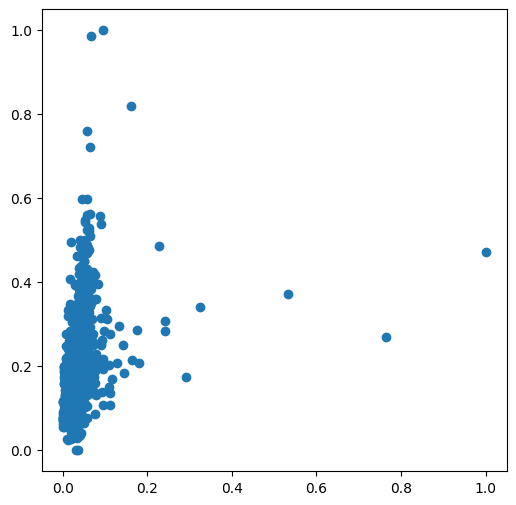

In [558]:
df_train.info()

plt.figure(figsize=[6,6])
plt.scatter(df_train.LotArea, df_train.SalePrice)
plt.show()

In [559]:
df_train.info()
x_train = x_train.dropna()
x_test = x_test.dropna()

df_train = df_train.dropna()
y_train = df_train.pop('SalePrice')
x_train = df_train

<class 'pandas.core.frame.DataFrame'>
Index: 1021 entries, 210 to 79
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SaleType      1021 non-null   float64
 1   LotArea       1021 non-null   float64
 2   LotFrontage   844 non-null    float64
 3   OverallQual   1021 non-null   float64
 4   OverallCond   1021 non-null   float64
 5   MasVnrArea    1017 non-null   float64
 6   TotalBsmtSF   1021 non-null   float64
 7   GrLivArea     1021 non-null   float64
 8   BsmtUnfSF     1021 non-null   float64
 9   TotRmsAbvGrd  1021 non-null   float64
 10  SalePrice     1021 non-null   float64
dtypes: float64(11)
memory usage: 95.7 KB


In [560]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [561]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('SaleType', True, 1),
 ('LotArea', True, 1),
 ('LotFrontage', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotRmsAbvGrd', True, 1)]

In [562]:
col = x_train.columns[rfe.support_]
col

Index(['SaleType', 'LotArea', 'LotFrontage', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'BsmtUnfSF', 'TotRmsAbvGrd'],
      dtype='object')

In [563]:
x_train.columns[~rfe.support_]

Index([], dtype='object')

In [564]:
x_train.columns[~rfe.support_]

Index([], dtype='object')

In [565]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     241.1
Date:                Wed, 01 May 2024   Prob (F-statistic):          1.20e-237
Time:                        22:08:53   Log-Likelihood:                 1210.3
No. Observations:                 841   AIC:                            -2399.
Df Residuals:                     830   BIC:                            -2347.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1294      0.013     -9.797   

In [566]:
x_train_new = x_train_rfe.drop(['OverallQual'], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     139.0
Date:                Wed, 01 May 2024   Prob (F-statistic):          3.84e-159
Time:                        22:08:53   Log-Likelihood:                 1023.8
No. Observations:                 841   AIC:                            -2028.
Df Residuals:                     831   BIC:                            -1980.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0063      0.014      0.434   

In [567]:
x_train_new.columns

Index(['const', 'SaleType', 'LotArea', 'LotFrontage', 'OverallCond',
       'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'BsmtUnfSF', 'TotRmsAbvGrd'],
      dtype='object')

In [568]:
#const should be dropped for VIF calc

x_train_new = x_train_new.drop(['const'], axis=1)

In [569]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame() 
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,GrLivArea,19.57
8,TotRmsAbvGrd,17.55
5,TotalBsmtSF,11.08
2,LotFrontage,7.51
3,OverallCond,6.05
7,BsmtUnfSF,3.47
1,LotArea,2.50
4,MasVnrArea,1.68
0,SaleType,1.10


In [570]:
#Residual Analysis for training model
y_train_price = lm.predict(x_train_lm) 

/tmp/ipykernel_41347/1409118921.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


Text(0.5, 0, 'Errors')

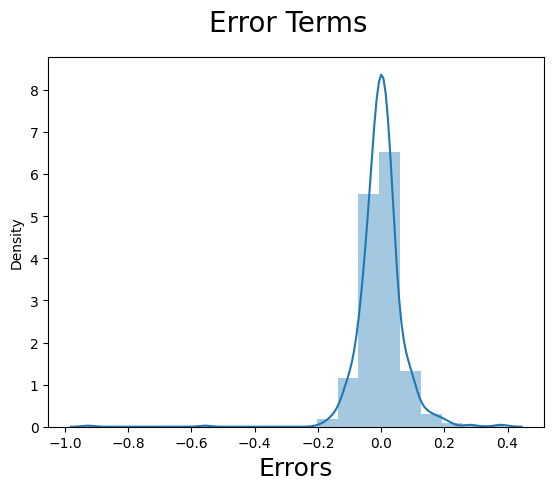

In [571]:
#Model selection 
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [572]:
#Applying the scaling on the test sets
df_test.info()
scaler_vars = ['SaleType','LotArea','LotFrontage','OverallQual','OverallCond','MasVnrArea','TotalBsmtSF','GrLivArea','BsmtUnfSF','TotRmsAbvGrd','SalePrice']
df_test[scaler_vars] = scaler.transform(df_test[scaler_vars])


<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 1436 to 266
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SaleType      438 non-null    int64  
 1   LotArea       438 non-null    int64  
 2   LotFrontage   356 non-null    float64
 3   OverallQual   438 non-null    int64  
 4   OverallCond   438 non-null    int64  
 5   MasVnrArea    434 non-null    float64
 6   TotalBsmtSF   438 non-null    int64  
 7   GrLivArea     438 non-null    int64  
 8   BsmtUnfSF     438 non-null    int64  
 9   TotRmsAbvGrd  438 non-null    int64  
 10  SalePrice     438 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 41.1 KB


In [573]:
#x_train_new.head()
# #Dividing data into X_test and y_test
y_test = df_test.pop('SalePrice')
x_test = df_test

# Creating X_test_new dataframe by dropping variables from X_test 
x_test_new = x_test[x_train_new.columns]
# # Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)
# Making predictions
y_pred = lm.predict(x_test_new)

Text(0, 0.5, 'y_pred')

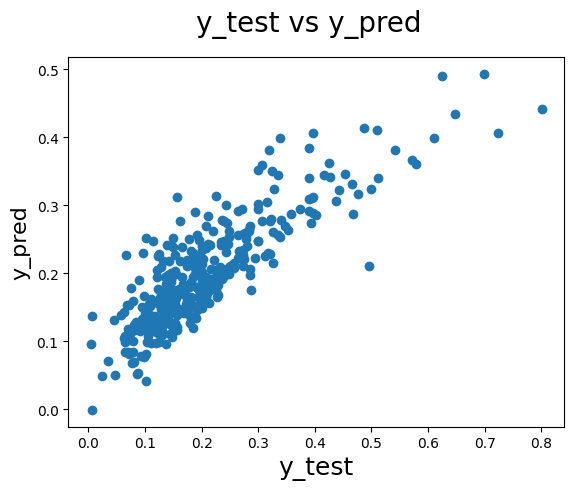

In [574]:
#Model Evaluation
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test', fontsize=18)              
plt.ylabel('y_pred', fontsize=16)              

In [575]:
#Multiple Linear Regression
from sklearn.model_selection import train_test_split

df2 = df[['SaleType','LotArea','LotFrontage','OverallQual','OverallCond','MasVnrArea','TotalBsmtSF','GrLivArea','BsmtUnfSF','TotRmsAbvGrd','SalePrice']]
n=10
np.random.seed(0)
df2_train, df2_test = train_test_split(df2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [576]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_vars = ['SaleType','LotArea','LotFrontage','OverallQual','OverallCond','MasVnrArea','TotalBsmtSF','GrLivArea','BsmtUnfSF','TotRmsAbvGrd','SalePrice']

df2_train[scaler_vars] = scaler.fit_transform(df2_train[scaler_vars])
df2_train.head()

,SaleType,LotArea,LotFrontage,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtUnfSF,TotRmsAbvGrd,SalePrice
210,0.0,0.019306,0.157534,0.444444,0.625,0.00,0.141408,0.081860,0.169521,0.181818,0.087627
318,0.0,0.039403,0.236301,0.666667,0.500,0.16,0.220458,0.424289,0.154110,0.545455,0.312595
239,0.0,0.033981,0.106164,0.555556,0.375,0.00,0.120295,0.201576,0.274401,0.363636,0.108457
986,0.0,0.017931,0.130137,0.555556,0.875,0.00,0.079378,0.230015,0.207620,0.181818,0.114012
1416,0.0,0.046139,0.133562,0.333333,0.625,0.00,0.127169,0.355880,0.332620,0.727273,0.121650


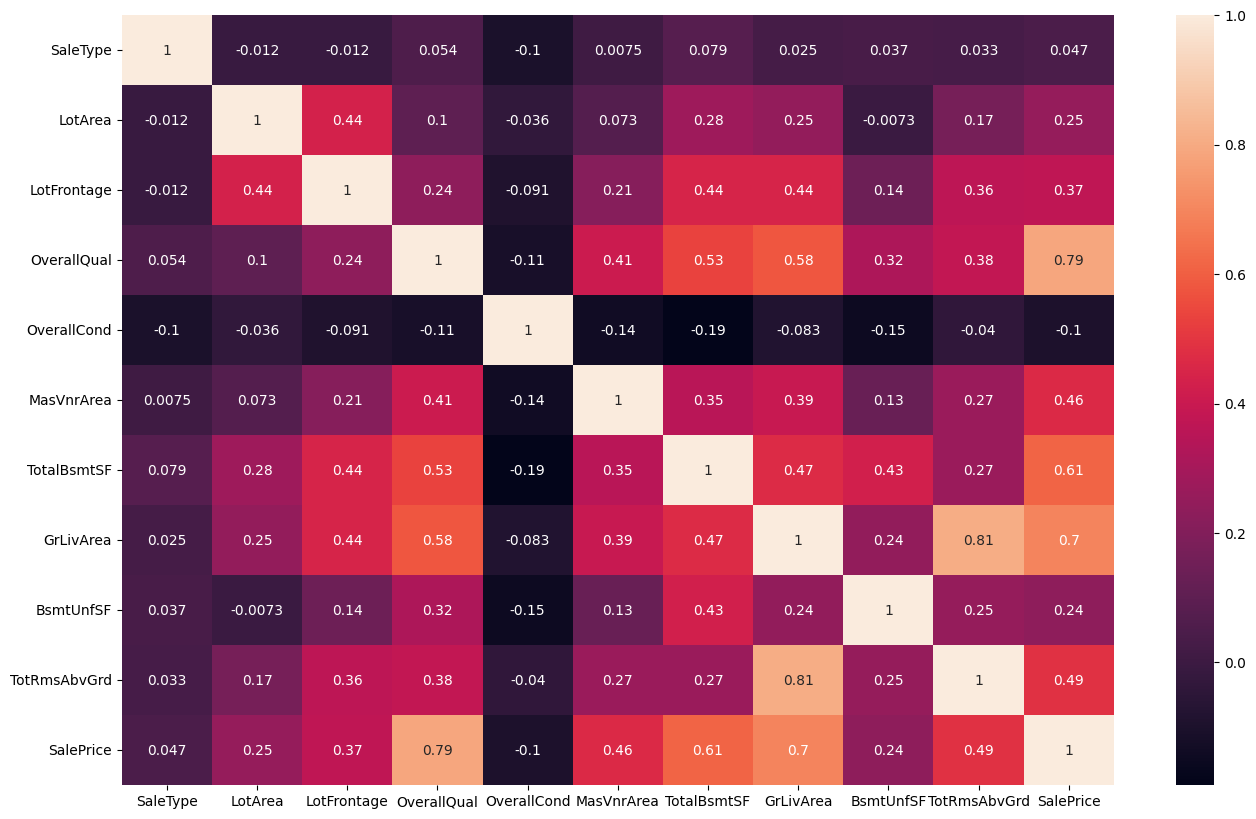

In [577]:
# correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df2_train.corr(), annot = True, )
plt.show()

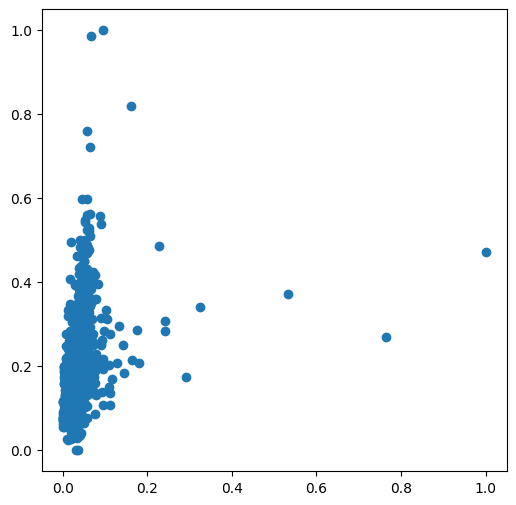

In [578]:
plt.figure(figsize=[6,6])
plt.scatter(df2_train.LotArea, df2_train.SalePrice)
plt.show()

In [579]:
y2_train = df2_train.pop('SalePrice')
x2_train = df2_train
import statsmodels.api as sm

# Add a constant
x2_train_lm = sm.add_constant(x2_train[['SaleType']])

# Create a first fitted model
lr = sm.OLS(y2_train, x2_train_lm).fit()
# Check the parameters obtained

lr.params

const       0.200652
SaleType    0.047543
dtype: float64

In [581]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.255
Date:                Wed, 01 May 2024   Prob (F-statistic):              0.133
Time:                        22:08:55   Log-Likelihood:                 808.05
No. Observations:                1021   AIC:                            -1612.
Df Residuals:                    1019   BIC:                            -1602.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2007      0.004     56.199      0.0

   SaleType  group_count
0         0         1267
1         1          122
2         2           43
3         3            9
4         4            5
5         5            4
6         6            5
7         7            2
8         8            3


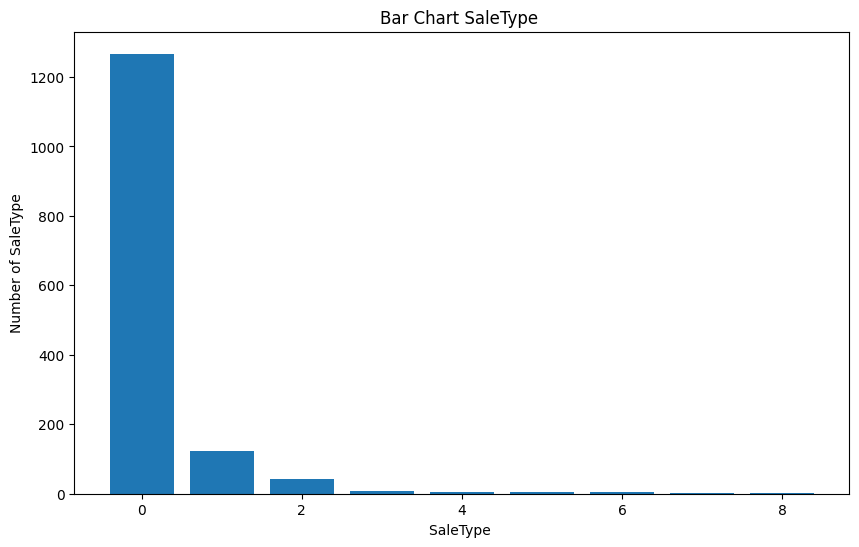

In [600]:

filtered_df = df.groupby('SaleType')['SaleType'].size().to_frame('count')
filtered_df.reset_index(inplace=True)
filtered_df.rename(columns={'count': 'group_count'}, inplace=True)
print(filtered_df)
x = filtered_df['SaleType']
y = filtered_df['group_count']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_title('Bar Chart SaleType ')
ax.set_xlabel('SaleType ')
ax.set_ylabel('Number of SaleType')
plt.show()

/tmp/ipykernel_41347/2568604317.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i])
/tmp/ipykernel_41347/2568604317.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i])
/tmp/ipykernel_41347/2568604317.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seab

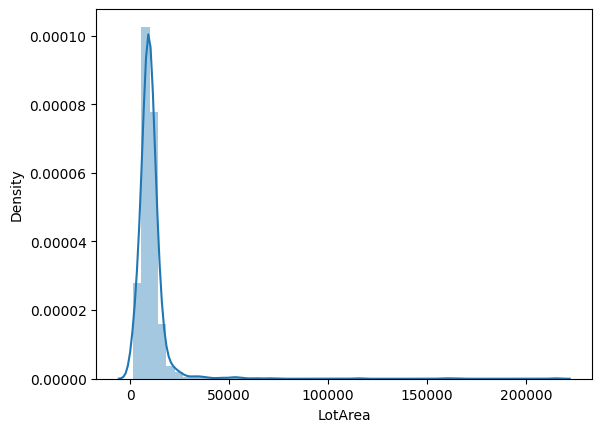

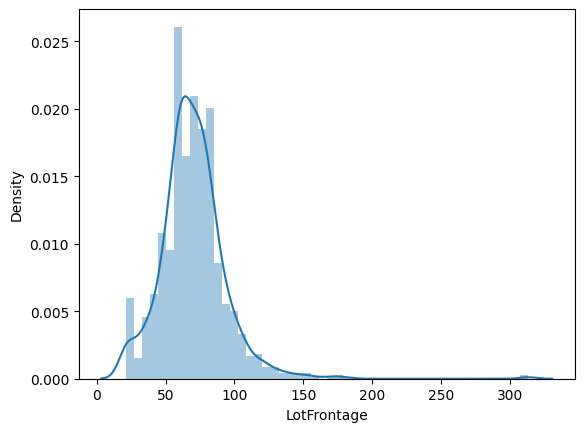

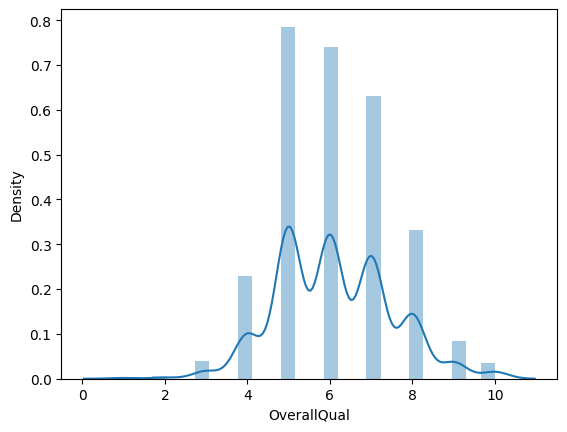

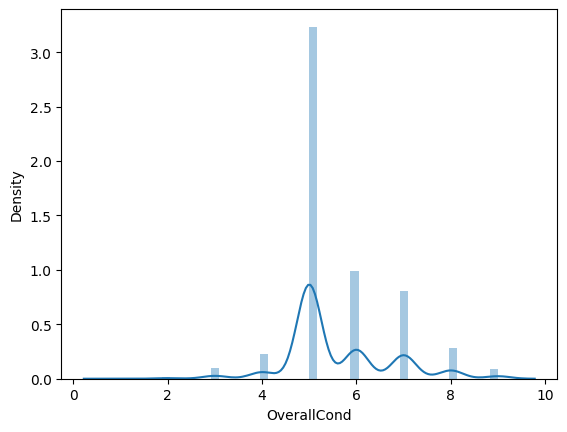

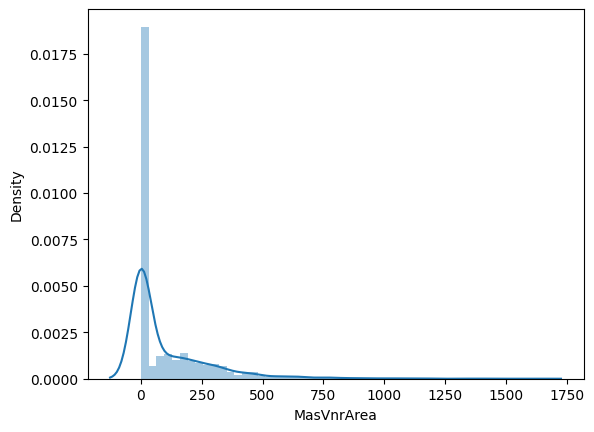

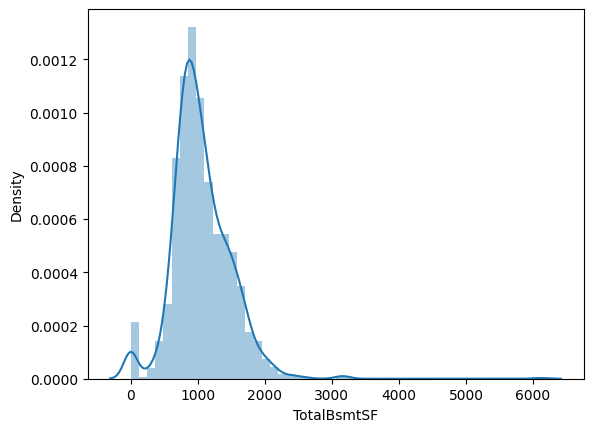

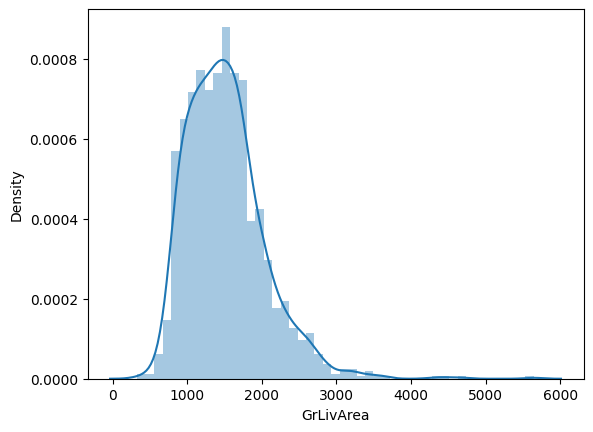

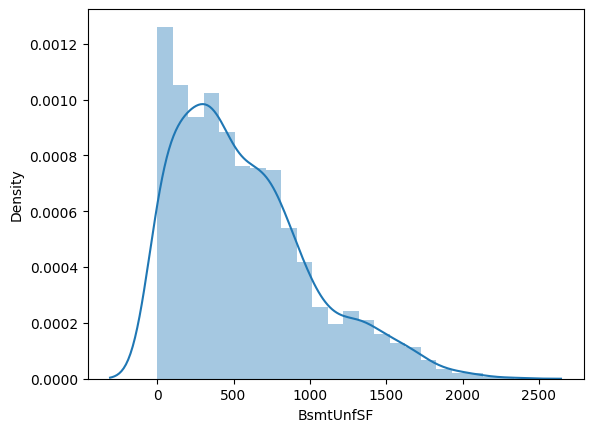

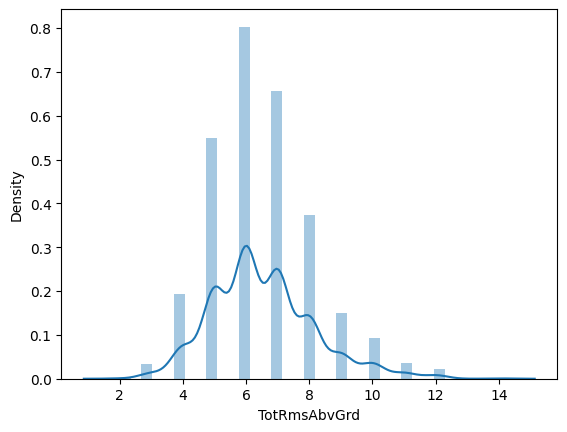

In [601]:
# Decide dependent and independent variables
X = df.drop('SalePrice', axis=1)
y = df[['SalePrice']]

a=['LotArea','LotFrontage','OverallQual','OverallCond','MasVnrArea','TotalBsmtSF','GrLivArea','BsmtUnfSF','TotRmsAbvGrd']
for i in a:
    plt.figure()
    sns.distplot(X[i])

/tmp/ipykernel_41347/389726768.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

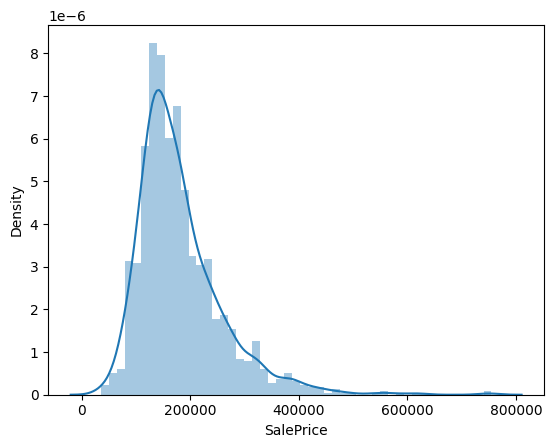

In [602]:
sns.distplot(y['SalePrice'])

In [603]:
from sklearn import preprocessing

sel_cols = ['LotArea','LotFrontage','OverallQual','OverallCond','MasVnrArea','TotalBsmtSF','GrLivArea','BsmtUnfSF','TotRmsAbvGrd','SaleType']

X = df[sel_cols]

X=X.apply(lambda X: X.fillna(X.median()),axis=0)

# Scaling
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns) 

In [604]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [605]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for LotArea is 0.07789729135164875
The coefficient for LotFrontage is -0.01322920155637608
The coefficient for OverallQual is 0.4963813154747441
The coefficient for OverallCond is 0.026988367850776147
The coefficient for MasVnrArea is 0.09568879055892905
The coefficient for TotalBsmtSF is 0.19155586078026182
The coefficient for GrLivArea is 0.1932396609720801
The coefficient for BsmtUnfSF is -0.0941130711701604
The coefficient for TotRmsAbvGrd is 0.07708540300413874
The coefficient for SaleType is 0.0150254324540533


In [606]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = regression_model.predict(X_train)

r2_score(y_train, y_pred)

# Make predictions on training data
y_pred_train = regression_model.predict(X_train)

# Evaluate the model on training data
r2_train = r2_score(y_train, y_pred_train)
print("R2 Score on Training Data:", r2_train)

rss_train = np.sum(np.square(y_train - y_pred_train))
print("Residual Sum of Squares on Training Data:", rss_train)

mse_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error on Training Data:", mse_train)

rmse_train = mse_train ** 0.5
print("Root Mean Squared Error on Training Data:", rmse_train)

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

R2 Score on Training Data: 0.7305678786021826
Residual Sum of Squares on Training Data: SalePrice    259.724138
dtype: float64
Mean Squared Error on Training Data: 0.2541332075464024
Root Mean Squared Error on Training Data: 0.5041162639177618
The intercept for our model is -0.009340034834956563


In [607]:
ridge = Ridge(alpha=0.1) 
ridge.fit(X_train,y_train)
for i,col in enumerate(X_train.columns):   
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[0][i]))

Ridge model coefficients for LotArea is 0.07789131870851072:
Ridge model coefficients for LotFrontage is -0.013217524281193003:
Ridge model coefficients for OverallQual is 0.49631040447892877:
Ridge model coefficients for OverallCond is 0.026984193482391262:
Ridge model coefficients for MasVnrArea is 0.09570225666028635:
Ridge model coefficients for TotalBsmtSF is 0.1915503246709955:
Ridge model coefficients for GrLivArea is 0.19324478475723636:
Ridge model coefficients for BsmtUnfSF is -0.0940857813492306:
Ridge model coefficients for TotRmsAbvGrd is 0.07709280436631052:
Ridge model coefficients for SaleType is 0.015025971393827092:


In [608]:
ridge = Ridge(alpha=0.5) 
ridge.fit(X_train,y_train)
for i,col in enumerate(X_train.columns):   
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[0][i]))

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge model coefficients for LotArea is 0.07786746246708784:
Ridge model coefficients for LotFrontage is -0.013170844550486758:
Ridge model coefficients for OverallQual is 0.49602706113954564:
Ridge model coefficients for OverallCond is 0.02696749517034112:
Ridge model coefficients for MasVnrArea is 0.09575602928922848:
Ridge model coefficients for TotalBsmtSF is 0.19152817341305087:
Ridge model coefficients for GrLivArea is 0.19326512506907143:
Ridge model coefficients for BsmtUnfSF is -0.09397672684822486:
Ridge model coefficients for TotRmsAbvGrd is 0.07712244830265556:
Ridge model coefficients for SaleType is 0.01502812161433921:
0.7305677835613592
0.8222184761073315


In [609]:
ridge = Ridge(alpha=10) 
ridge.fit(X_train,y_train)
for i,col in enumerate(X_train.columns):   
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[0][i]))

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge model coefficients for LotArea is 0.07731643479936204:
Ridge model coefficients for LotFrontage is -0.012075841503138094:
Ridge model coefficients for OverallQual is 0.4894353667008013:
Ridge model coefficients for OverallCond is 0.026570639283102652:
Ridge model coefficients for MasVnrArea is 0.09699092136682422:
Ridge model coefficients for TotalBsmtSF is 0.19099874292012506:
Ridge model coefficients for GrLivArea is 0.19368015755663426:
Ridge model coefficients for BsmtUnfSF is -0.0914348097245869:
Ridge model coefficients for TotRmsAbvGrd is 0.07784165002325527:
Ridge model coefficients for SaleType is 0.015076747859755994:
0.7305310561057494
0.8214755092678381


In [610]:
ridge = Ridge(alpha=100) 
ridge.fit(X_train,y_train)
for i,col in enumerate(X_train.columns):   
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[0][i]))

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge model coefficients for LotArea is 0.073186839958369:
Ridge model coefficients for LotFrontage is -0.0028751614328232284:
Ridge model coefficients for OverallQual is 0.437466667844899:
Ridge model coefficients for OverallCond is 0.02287267415663737:
Ridge model coefficients for MasVnrArea is 0.10543024544148609:
Ridge model coefficients for TotalBsmtSF is 0.18569579671786882:
Ridge model coefficients for GrLivArea is 0.19381308542990738:
Ridge model coefficients for BsmtUnfSF is -0.07112348677338644:
Ridge model coefficients for TotRmsAbvGrd is 0.08464614619700501:
Ridge model coefficients for SaleType is 0.015393160281147256:
0.7277481498400025
0.8122363967143846


In [611]:
ridge = Ridge(alpha=1000) 
ridge.fit(X_train,y_train)
for i,col in enumerate(X_train.columns):   
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[0][i]))

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge model coefficients for LotArea is 0.05716896366832479:
Ridge model coefficients for LotFrontage is 0.03249703563779407:
Ridge model coefficients for OverallQual is 0.24365913446454296:
Ridge model coefficients for OverallCond is 0.0021768185325716765:
Ridge model coefficients for MasVnrArea is 0.10378711900717764:
Ridge model coefficients for TotalBsmtSF is 0.14134191375800664:
Ridge model coefficients for GrLivArea is 0.15772565923495266:
Ridge model coefficients for BsmtUnfSF is -0.0009266045633218096:
Ridge model coefficients for TotRmsAbvGrd is 0.09772674950535226:
Ridge model coefficients for SaleType is 0.015229044756452566:
0.6566490228767949
0.7021282639575378


In [619]:
ridge = Ridge(alpha=10000) 
ridge.fit(X_train,y_train)
for i,col in enumerate(X_train.columns):   
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[0][i]))

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge model coefficients for LotArea is 0.020590410386271185:
Ridge model coefficients for LotFrontage is 0.02142040432262988:
Ridge model coefficients for OverallQual is 0.05975518630746552:
Ridge model coefficients for OverallCond is -0.005446593740427547:
Ridge model coefficients for MasVnrArea is 0.034333487903321115:
Ridge model coefficients for TotalBsmtSF is 0.04463844616429914:
Ridge model coefficients for GrLivArea is 0.05138444219293809:
Ridge model coefficients for BsmtUnfSF is 0.012813403710678102:
Ridge model coefficients for TotRmsAbvGrd is 0.03849779231912104:
Ridge model coefficients for SaleType is 0.006266886766567405:
0.28993146879252274
0.28818829181211547


In [620]:
ridge = Ridge(alpha=100000) 
ridge.fit(X_train,y_train)
for i,col in enumerate(X_train.columns):   
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[0][i]))

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge model coefficients for LotArea is 0.0027442934224443383:
Ridge model coefficients for LotFrontage is 0.0030524608411054885:
Ridge model coefficients for OverallQual is 0.007348356388906868:
Ridge model coefficients for OverallCond is -0.0008731691705441885:
Ridge model coefficients for MasVnrArea is 0.00442021109000581:
Ridge model coefficients for TotalBsmtSF is 0.005768959544003416:
Ridge model coefficients for GrLivArea is 0.006657572000180941:
Ridge model coefficients for BsmtUnfSF is 0.001955130403534184:
Ridge model coefficients for TotRmsAbvGrd is 0.005128660813040611:
Ridge model coefficients for SaleType is 0.0008514821166736861:
0.042112419752340924
0.04058931714899028


In [612]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.7305678786021826
0.8222557634804333


In [613]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

Lasso model coefficients for LotArea is 0.017322864355142662:
Lasso model coefficients for LotFrontage is 0.0:
Lasso model coefficients for OverallQual is 0.43418288325951365:
Lasso model coefficients for OverallCond is 0.0:
Lasso model coefficients for MasVnrArea is 0.04080887575475681:
Lasso model coefficients for TotalBsmtSF is 0.1193251730790127:
Lasso model coefficients for GrLivArea is 0.23754161532291065:
Lasso model coefficients for BsmtUnfSF is -0.0:
Lasso model coefficients for TotRmsAbvGrd is 0.0:
Lasso model coefficients for SaleType is 0.0:
0.6980676102364192
0.7690754648863464


In [614]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

Lasso model coefficients for LotArea is 0.0:
Lasso model coefficients for LotFrontage is 0.0:
Lasso model coefficients for OverallQual is 0.223298981755747:
Lasso model coefficients for OverallCond is -0.0:
Lasso model coefficients for MasVnrArea is 0.0:
Lasso model coefficients for TotalBsmtSF is 0.0:
Lasso model coefficients for GrLivArea is 0.04098267082887665:
Lasso model coefficients for BsmtUnfSF is 0.0:
Lasso model coefficients for TotRmsAbvGrd is 0.0:
Lasso model coefficients for SaleType is 0.0:
0.34427877798440887
0.3577970304469219


In [615]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

Lasso model coefficients for LotArea is 0.0:
Lasso model coefficients for LotFrontage is 0.0:
Lasso model coefficients for OverallQual is 0.0:
Lasso model coefficients for OverallCond is -0.0:
Lasso model coefficients for MasVnrArea is 0.0:
Lasso model coefficients for TotalBsmtSF is 0.0:
Lasso model coefficients for GrLivArea is 0.0:
Lasso model coefficients for BsmtUnfSF is 0.0:
Lasso model coefficients for TotRmsAbvGrd is 0.0:
Lasso model coefficients for SaleType is 0.0:
0.0
-0.00041647622797813533


In [616]:
lasso = Lasso(alpha=10)
lasso.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

Lasso model coefficients for LotArea is 0.0:
Lasso model coefficients for LotFrontage is 0.0:
Lasso model coefficients for OverallQual is 0.0:
Lasso model coefficients for OverallCond is -0.0:
Lasso model coefficients for MasVnrArea is 0.0:
Lasso model coefficients for TotalBsmtSF is 0.0:
Lasso model coefficients for GrLivArea is 0.0:
Lasso model coefficients for BsmtUnfSF is 0.0:
Lasso model coefficients for TotRmsAbvGrd is 0.0:
Lasso model coefficients for SaleType is 0.0:
0.0
-0.00041647622797813533


In [617]:
lasso = Lasso(alpha=100)
lasso.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

Lasso model coefficients for LotArea is 0.0:
Lasso model coefficients for LotFrontage is 0.0:
Lasso model coefficients for OverallQual is 0.0:
Lasso model coefficients for OverallCond is -0.0:
Lasso model coefficients for MasVnrArea is 0.0:
Lasso model coefficients for TotalBsmtSF is 0.0:
Lasso model coefficients for GrLivArea is 0.0:
Lasso model coefficients for BsmtUnfSF is 0.0:
Lasso model coefficients for TotRmsAbvGrd is 0.0:
Lasso model coefficients for SaleType is 0.0:
0.0
-0.00041647622797813533


In [618]:
lasso = Lasso(alpha=1000)
lasso.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

Lasso model coefficients for LotArea is 0.0:
Lasso model coefficients for LotFrontage is 0.0:
Lasso model coefficients for OverallQual is 0.0:
Lasso model coefficients for OverallCond is -0.0:
Lasso model coefficients for MasVnrArea is 0.0:
Lasso model coefficients for TotalBsmtSF is 0.0:
Lasso model coefficients for GrLivArea is 0.0:
Lasso model coefficients for BsmtUnfSF is 0.0:
Lasso model coefficients for TotRmsAbvGrd is 0.0:
Lasso model coefficients for SaleType is 0.0:
0.0
-0.00041647622797813533
